In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import networkx as nx
from community import community_louvain
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [ ]:
df_group_edges = pd.read_csv('/content/drive/MyDrive/IS353/data/group-edges.csv')
df_member_edges = pd.read_csv('/content/drive/MyDrive/IS353/data/member_edges_25k.csv')

In [ ]:
df_group_edges

,group1,group2,weight
0,19292162,535553,2
1,19292162,19194894,1
2,19292162,19728145,1
3,19292162,18850080,2
4,19292162,1728035,1
...,...,...,...
6687,1576921,1642477,2
6688,18882523,18573279,1
6689,18882523,19654655,1
6690,18573279,19654655,2


In [ ]:
df_member_edges

,Unnamed: 0,member1,member2,weight
0,4974,211551769,158793082,2
1,5622,32671432,110832222,2
2,24502,28573892,176110612,1
3,18281,195657825,203184347,1
4,23394,195231923,161882042,1
...,...,...,...,...
24989,23030,216367274,42955792,1
24990,21862,85557392,193874577,1
24991,24932,230457540,174683552,1
24992,22660,226951319,8243584,1


In [ ]:
G = nx.from_pandas_edgelist(df_member_edges, 'member1', 'member2', create_using = nx.Graph())

In [ ]:
# compute the best partition
partition = community_louvain.best_partition(G)

In [ ]:
# draw the graph
pos_spring = nx.spring_layout(G)
pos_fruchterman = nx.fruchterman_reingold_layout(G)

<ipython-input-154-f2be21807a07>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_ncar', max(partition.values()) + 1)


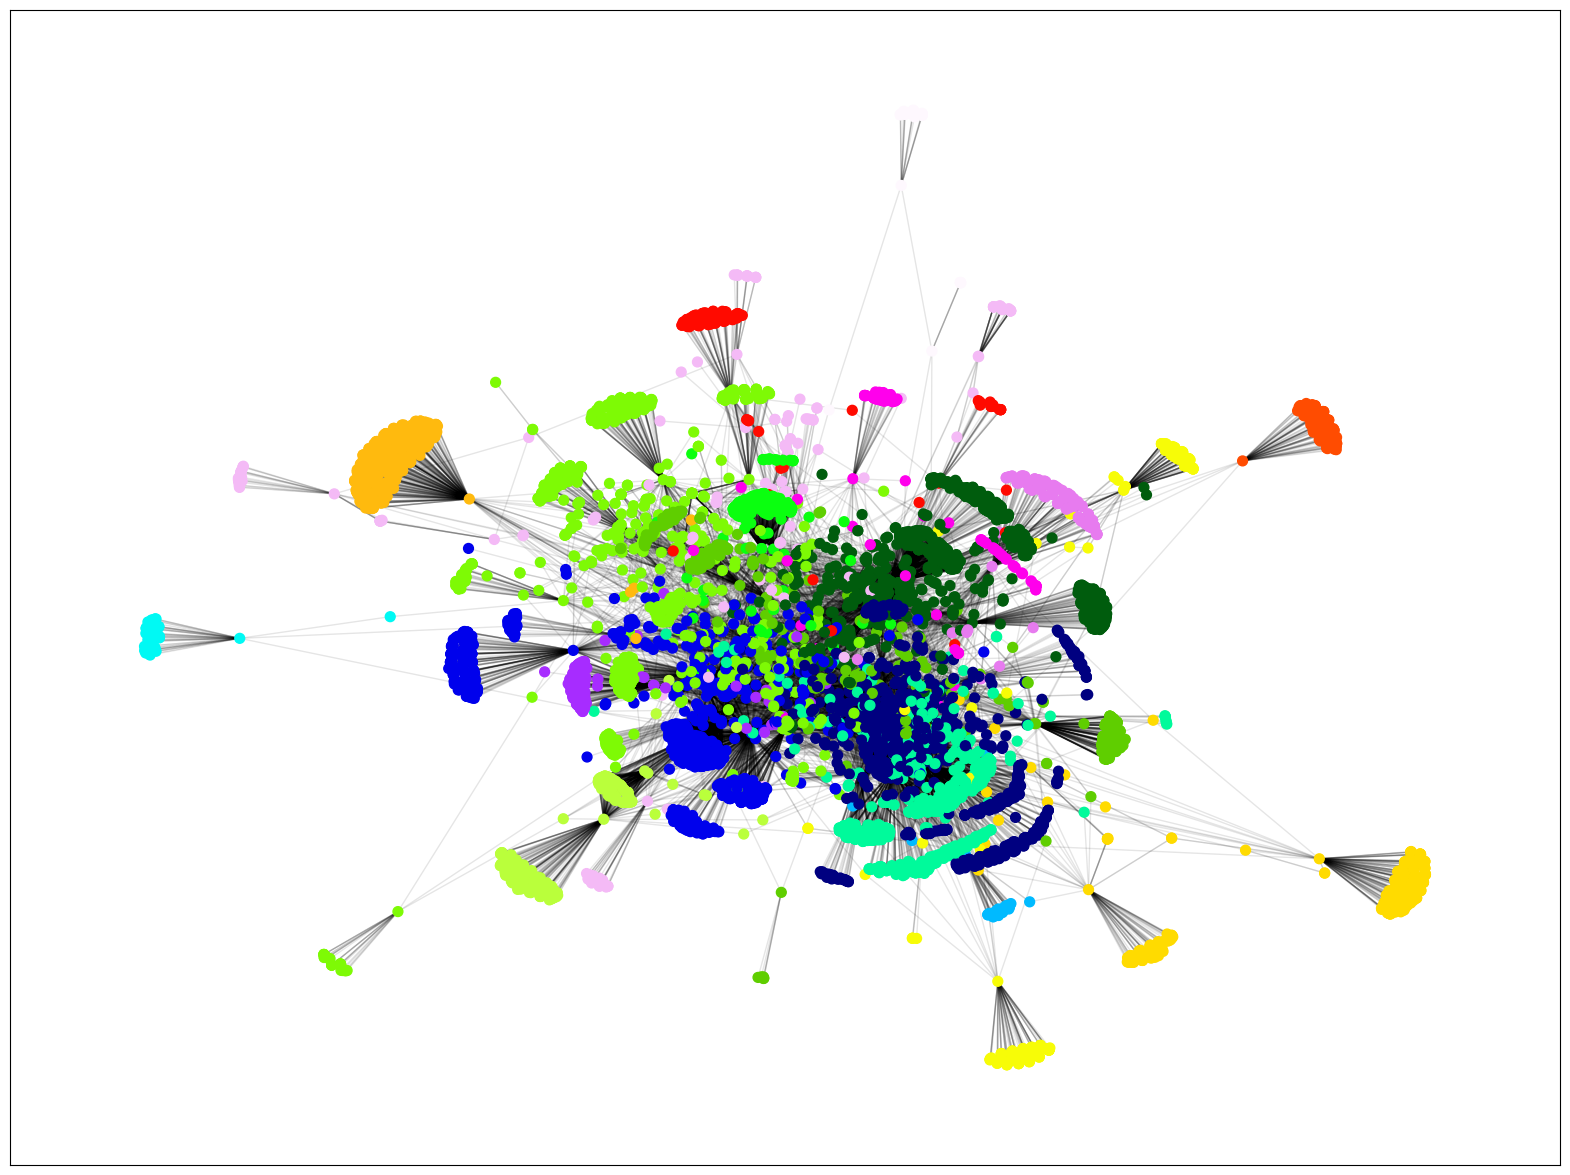

In [ ]:
# member
plt.figure(figsize=(20, 15))
cmap = cm.get_cmap('gist_ncar', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos_spring, partition.keys(), node_size = 50, cmap = cmap, node_color = list(partition.values()))
nx.draw_networkx_edges(G, pos_spring, alpha = 0.1)
plt.show()

<ipython-input-153-d63c0f0d60ae>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_ncar', max(partition.values()) + 1)


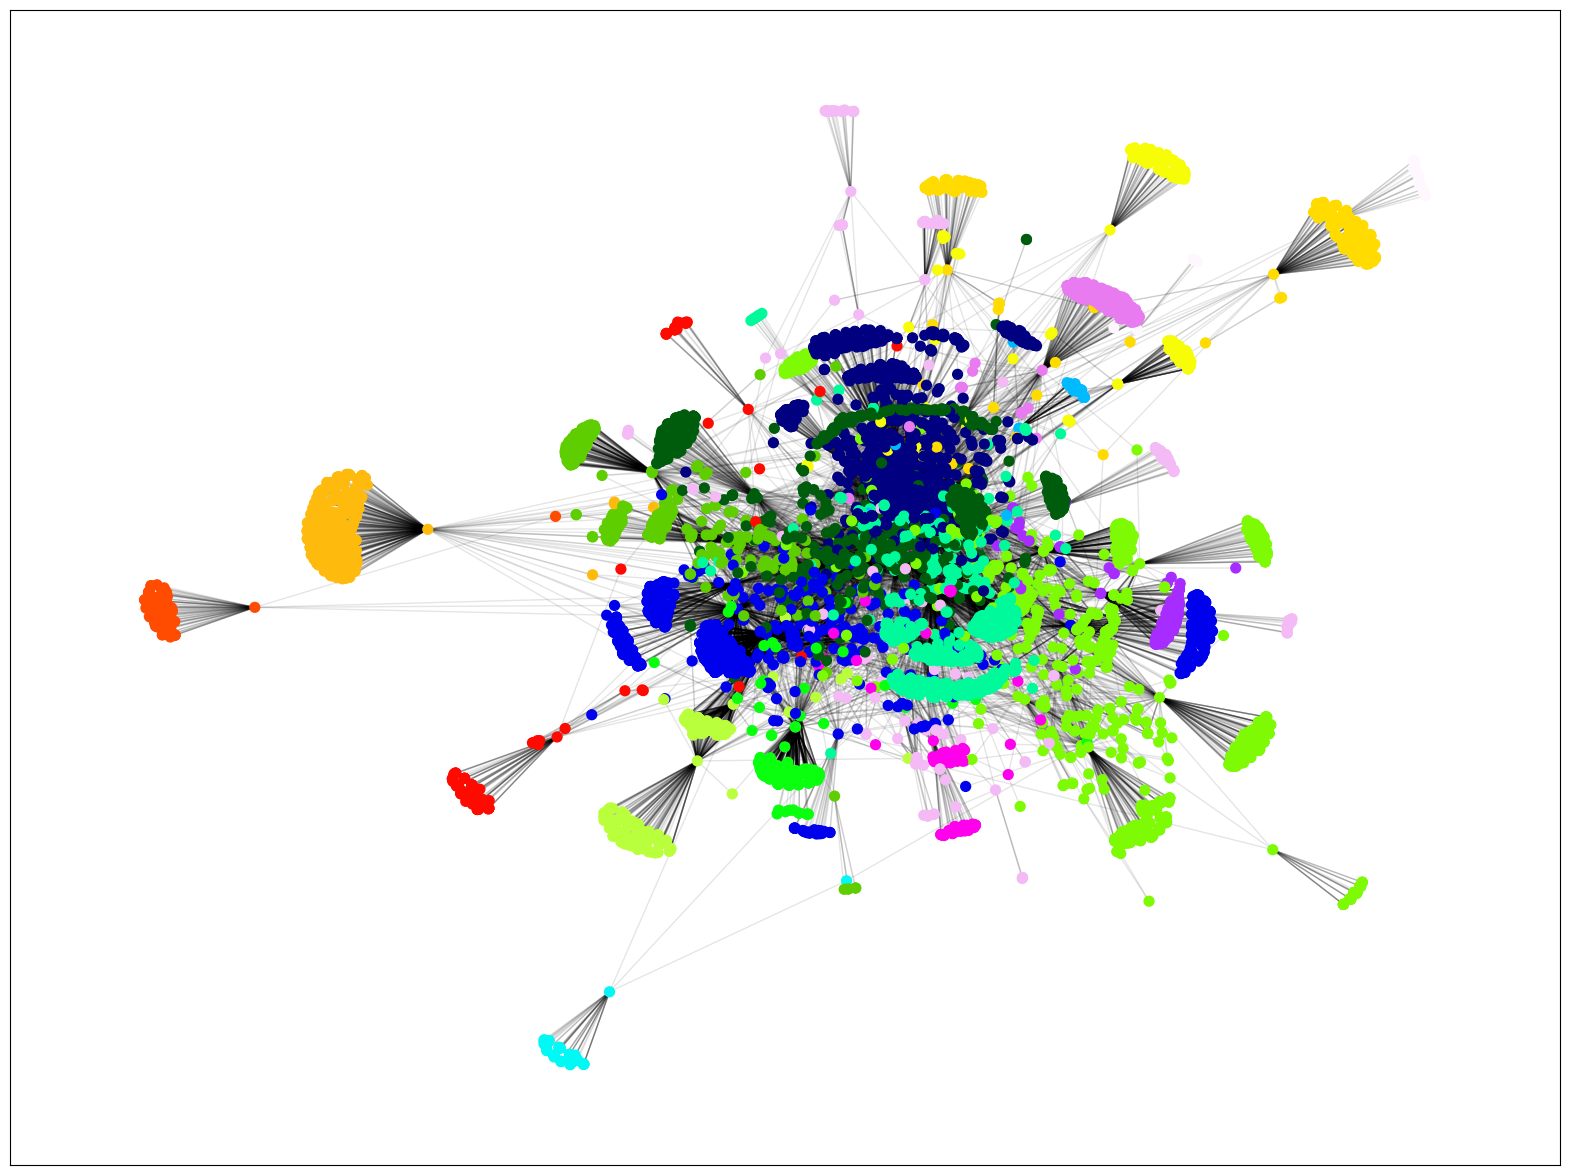

In [ ]:
# member
plt.figure(figsize=(20, 15))
cmap = cm.get_cmap('gist_ncar', max(partition.values()) + 1)
nx.draw_networkx_nodes(G, pos_fruchterman, partition.keys(), node_size = 50, cmap = cmap, node_color = list(partition.values()))
nx.draw_networkx_edges(G, pos_fruchterman, alpha = 0.1)
plt.show()

In [ ]:
G_group = nx.from_pandas_edgelist(df_group_edges, 'group1', 'group2', create_using = nx.Graph())

In [ ]:
# compute the best partition
partition_group = community_louvain.best_partition(G_group)

# draw the graph
pos_group_spring = nx.spring_layout(G_group)
pos_group_fruchterman = nx.fruchterman_reingold_layout(G_group)

<ipython-input-171-615830ff55f3>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_rainbow', max(partition_group.values()) + 1)


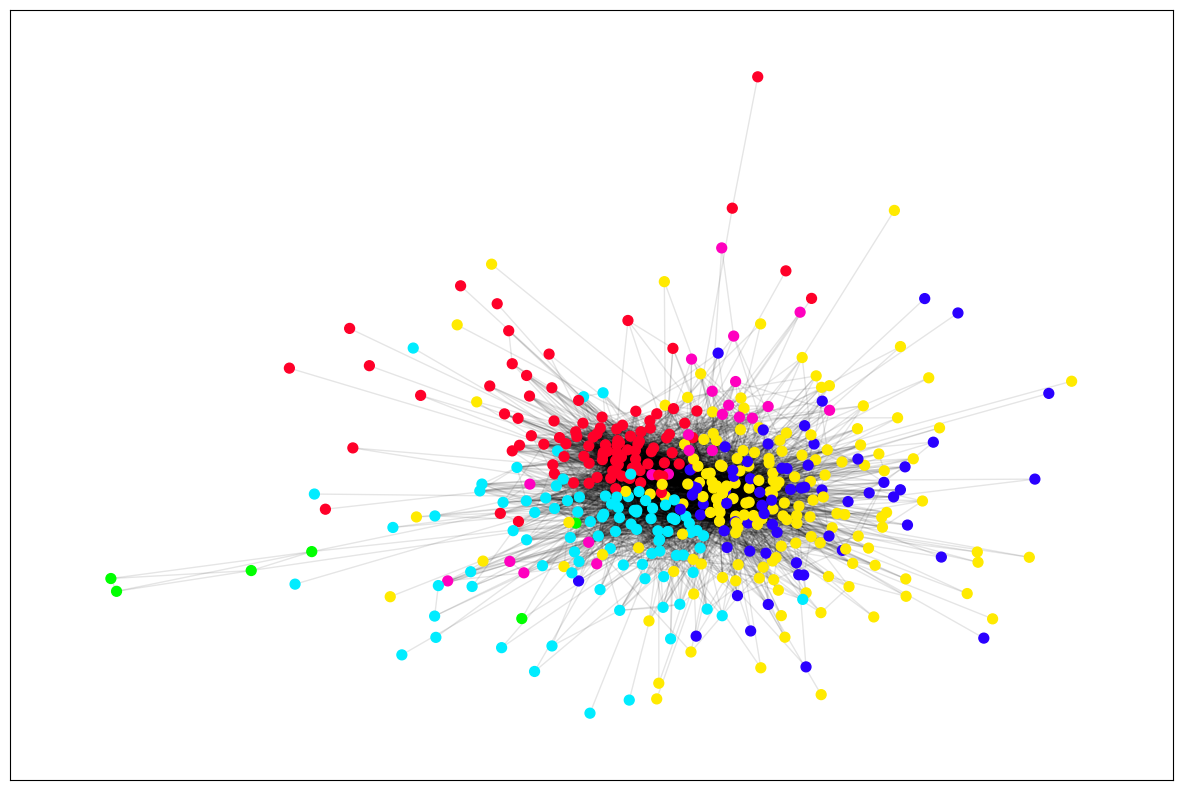

In [ ]:
plt.figure(figsize=(15, 10))
cmap = cm.get_cmap('gist_rainbow', max(partition_group.values()) + 1)
nx.draw_networkx_nodes(G_group, pos_group_spring, partition_group.keys(), node_size = 50, cmap = cmap, node_color = list(partition_group.values()))
nx.draw_networkx_edges(G_group, pos_group_spring, alpha = 0.1)
plt.show()

<ipython-input-170-9654503e62fa>:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('gist_rainbow', max(partition_group.values()) + 1)


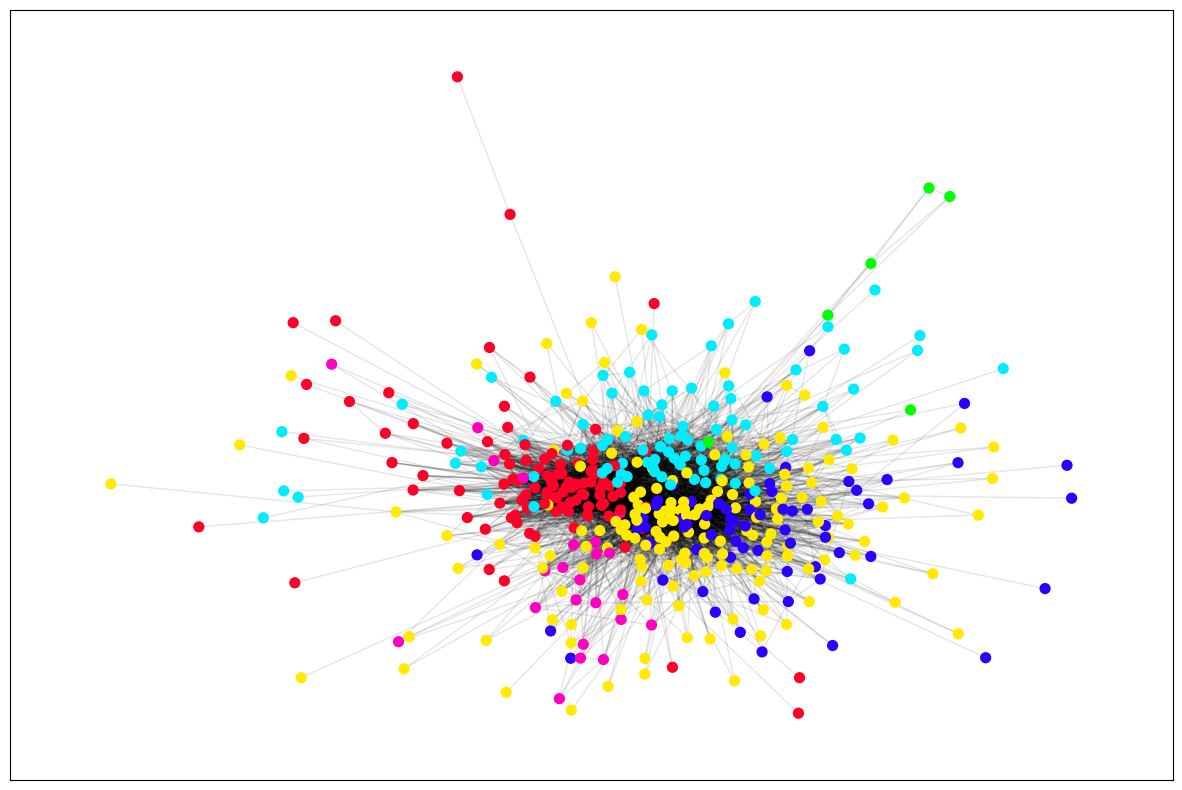

In [ ]:
plt.figure(figsize=(15, 10))
cmap = cm.get_cmap('gist_rainbow', max(partition_group.values()) + 1)
nx.draw_networkx_nodes(G_group, pos_group_fruchterman, partition_group.keys(), node_size = 50, cmap = cmap, node_color = list(partition_group.values()))
nx.draw_networkx_edges(G_group, pos_group_fruchterman, alpha = 0.1)
plt.show()